In [46]:
save_figs = True

# Not enough chunks

In [47]:
import pandas as pd
import nannyml as nml
reference, analysis, _ = nml.datasets.load_synthetic_binary_classification_dataset()
# metadata = nml.extract_metadata(reference, model_type='classification_binary', exclude_columns=['identifier'])
# metadata.target_column_name = 'work_home_actual'
cbpe = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='work_home_actual',
    timestamp_column_name='timestamp',
    chunk_number=8,
    metrics=['roc_auc']
).fit(reference_data=reference)
# Estimate on concatenated reference and analysis
est_perf = cbpe.estimate(pd.concat([reference, analysis], ignore_index=True))
# est_perf = cbpe.estimate(analysis)
est_perf.data#.iloc[3:5,:7]

,key,start_index,end_index,start_date,end_date,realized_roc_auc,estimated_roc_auc,upper_confidence_roc_auc,lower_confidence_roc_auc,upper_threshold_roc_auc,lower_threshold_roc_auc,alert_roc_auc
0,[0:12499],0,12499,2014-05-09 22:27:20,2015-03-10 03:50:28,0.972972,0.968923,0.969364,0.968483,0.964553,0.977452,False
1,[12500:24999],12500,24999,2015-03-10 04:37:25,2016-01-08 16:02:05,0.970533,0.968914,0.969355,0.968474,0.964553,0.977452,False
2,[25000:37499],25000,37499,2016-01-08 17:22:00,2016-11-03 19:17:29,0.970198,0.968930,0.969371,0.968490,0.964553,0.977452,False
3,[37500:49999],37500,49999,2016-11-03 19:18:08,2017-08-31 03:10:29,0.970788,0.969044,0.969484,0.968603,0.964553,0.977452,False
4,[50000:62499],50000,62499,2017-08-31 04:20:00,2018-07-02 16:13:22,NaN,0.969050,0.969490,0.968609,0.964553,0.977452,False
5,[62500:74999],62500,74999,2018-07-02 16:15:16,2019-04-30 11:01:30,NaN,0.969032,0.969472,0.968591,0.964553,0.977452,False
6,[75000:87499],75000,87499,2019-04-30 11:02:00,2020-03-01 22:53:25,NaN,0.960740,0.961181,0.960300,0.964553,0.977452,True
7,[87500:99999],87500,99999,2020-03-01 23:25:08,2021-01-01 04:29:32,NaN,0.961128,0.961569,0.960688,0.964553,0.977452,True


In [48]:
import pandas as pd
import nannyml as nml
reference, analysis, _ = nml.datasets.load_synthetic_binary_classification_dataset()

cbpe = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='work_home_actual',
    timestamp_column_name='timestamp',
    chunk_period="Q",
    metrics=['roc_auc']
).fit(reference_data=reference)
est_perf = cbpe.estimate(analysis)

C:\Users\jakub\anaconda3\envs\p39all\lib\site-packages\nannyml\chunk.py:175: UserWarning: The resulting list of chunks contains 1 underpopulated chunks. They contain too few records to be statistically robust and might negatively influence the quality of calculations. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(


In [49]:
cbpe = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='work_home_actual',
    timestamp_column_name='timestamp',
    chunk_number=5,
    metrics=['roc_auc']
).fit(reference_data=reference)
est_perf = cbpe.estimate(analysis)

C:\Users\jakub\anaconda3\envs\p39all\lib\site-packages\nannyml\chunk.py:164: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(
C:\Users\jakub\anaconda3\envs\p39all\lib\site-packages\nannyml\chunk.py:164: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(
C:\Users\jakub\anaconda3\envs\p39all\lib\site-packages\nannyml\chunk.py:164: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(


# Not enough observations in chunk

In [50]:
calc = nml.PerformanceCalculator(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='work_home_actual',
    timestamp_column_name='timestamp',
    metrics=["roc_auc"],
    chunk_size=1)

calc.fit(reference)
results = calc.calculate(reference)
results.data.head()

C:\Users\jakub\anaconda3\envs\p39all\lib\site-packages\nannyml\chunk.py:175: UserWarning: The resulting list of chunks contains 50000 underpopulated chunks. They contain too few records to be statistically robust and might negatively influence the quality of calculations. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(


,key,start_index,end_index,start_date,end_date,period,targets_missing_rate,roc_auc,roc_auc_lower_threshold,roc_auc_upper_threshold,roc_auc_alert
0,[0:0],0,0,2014-05-09 22:27:20,2014-05-09 22:27:20,None,0.0,NaN,NaN,NaN,False
1,[1:1],1,1,2014-05-09 22:59:32,2014-05-09 22:59:32,None,0.0,NaN,NaN,NaN,False
2,[2:2],2,2,2014-05-09 23:48:25,2014-05-09 23:48:25,None,0.0,NaN,NaN,NaN,False
3,[3:3],3,3,2014-05-10 01:12:09,2014-05-10 01:12:09,None,0.0,NaN,NaN,NaN,False
4,[4:4],4,4,2014-05-10 02:21:34,2014-05-10 02:21:34,None,0.0,NaN,NaN,NaN,False


# Sampling error

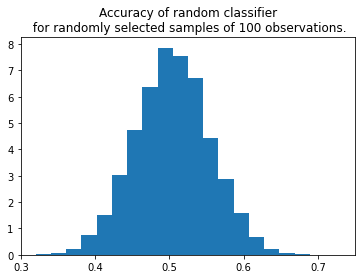

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

sample_size = 100
dataset_size = 10_000
# random model
np.random.seed(23)
y_true = np.random.binomial(1, 0.5, dataset_size)
y_pred = np.random.binomial(1, 0.5, dataset_size)
accuracy_scores = []

for experiment in range(10_000):
    subset_indexes = np.random.choice(dataset_size, sample_size, replace=False) # get random indexes
    y_true_subset = y_true[subset_indexes]
    y_pred_subset = y_pred[subset_indexes]
    accuracy_scores.append(accuracy_score(y_true_subset, y_pred_subset))

plt.hist(accuracy_scores, bins=20, density=True)
plt.title("Accuracy of random classifier\n for randomly selected samples of 100 observations.");
if save_figs:
    plt.savefig("../_static/deep_dive_data_chunks_stability_of_accuracy.svg", format="svg")

In [52]:
obs_level_accuracy = y_true == y_pred
np.mean(obs_level_accuracy), accuracy_score(y_true, y_pred)


(0.5045, 0.5045)

In [53]:
SEM_std = np.std(obs_level_accuracy)/np.sqrt(sample_size)
np.round(SEM_std, 3), np.round(np.std(accuracy_scores), 3)


(0.05, 0.05)